In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_pickle('/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/dataset/dataset_car/autos_v6.pkl')

In [4]:
df

,seller_type,year,transmission,km_driven,fuel,brand,selling_price
0,individual,1993,manual,150000,petrol,volkswagen,43200
1,individual,2011,manual,125000,diesel,audi,1647000
2,individual,2004,automatic,125000,diesel,jeep,882000
3,individual,2001,manual,150000,petrol,volkswagen,135000
4,individual,2008,manual,90000,diesel,skoda,324000
...,...,...,...,...,...,...,...
379424,individual,2013,manual,110000,petrol,hyundai,320000
379425,individual,2007,manual,119000,diesel,hyundai,135000
379426,individual,2009,manual,120000,diesel,maruti,382000
379427,individual,2013,manual,25000,diesel,tata,290000


In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
df.shape

(215995, 7)

In [7]:
cldf = df.reset_index()
cldf.drop('index', axis=1, inplace=True)

In [8]:
cldf

,seller_type,year,transmission,km_driven,fuel,brand,selling_price
0,individual,1993,manual,150000,petrol,volkswagen,43200
1,individual,2011,manual,125000,diesel,audi,1647000
2,individual,2004,automatic,125000,diesel,jeep,882000
3,individual,2001,manual,150000,petrol,volkswagen,135000
4,individual,2008,manual,90000,diesel,skoda,324000
...,...,...,...,...,...,...,...
215990,individual,2013,manual,50000,petrol,maruti,260000
215991,individual,2014,manual,80000,diesel,hyundai,475000
215992,individual,2013,manual,110000,petrol,hyundai,320000
215993,individual,2007,manual,119000,diesel,hyundai,135000


In [9]:
cldf.describe()

,year,km_driven,selling_price
count,215995.000000,2.159950e+05,2.159950e+05
mean,2004.403736,1.128892e+05,2.418580e+06
std,8.797876,4.578152e+04,4.232639e+08
min,1910.000000,1.000000e+00,0.000000e+00
25%,2000.000000,8.000000e+04,1.485000e+05
50%,2005.000000,1.250000e+05,3.825000e+05
75%,2010.000000,1.500000e+05,8.504550e+05
max,2020.000000,2.360457e+06,1.932735e+11


In [10]:
cldf['selling_price'].max()

193273528230

In [11]:
IQR = cldf['selling_price'].quantile(0.75) - cldf['selling_price'].quantile(0.25)
lowerbound = cldf['selling_price'].quantile(0.25) - (1.5*IQR)
upperbound = cldf['selling_price'].quantile(0.75) + (1.5*IQR)

In [12]:
upperbound

1903387.5

In [13]:
cldf2 = cldf[cldf['selling_price']<=upperbound]

In [14]:
cldf2['selling_price'].describe()

count    2.020190e+05
mean     4.914258e+05
std      4.494488e+05
min      0.000000e+00
25%      1.350000e+05
50%      3.465000e+05
75%      7.199100e+05
max      1.900000e+06
Name: selling_price, dtype: float64

In [15]:
cldf['km_driven'].describe()

count    2.159950e+05
mean     1.128892e+05
std      4.578152e+04
min      1.000000e+00
25%      8.000000e+04
50%      1.250000e+05
75%      1.500000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [16]:
IQR = cldf['km_driven'].quantile(0.75) - cldf['km_driven'].quantile(0.25)
lowerbound = cldf['km_driven'].quantile(0.25) - (1.5*IQR)
upperbound = cldf['km_driven'].quantile(0.75) + (1.5*IQR)

In [17]:
lowerbound, upperbound

(-25000.0, 255000.0)

In [17]:
cldf3  = cldf2[cldf2['km_driven']<=upperbound]
cldf3

,seller_type,year,transmission,km_driven,fuel,brand,selling_price
0,individual,1993,manual,150000,petrol,volkswagen,43200
1,individual,2011,manual,125000,diesel,audi,1647000
2,individual,2004,automatic,125000,diesel,jeep,882000
3,individual,2001,manual,150000,petrol,volkswagen,135000
4,individual,2008,manual,90000,diesel,skoda,324000
...,...,...,...,...,...,...,...
215990,individual,2013,manual,50000,petrol,maruti,260000
215991,individual,2014,manual,80000,diesel,hyundai,475000
215992,individual,2013,manual,110000,petrol,hyundai,320000
215993,individual,2007,manual,119000,diesel,hyundai,135000


<Axes: >

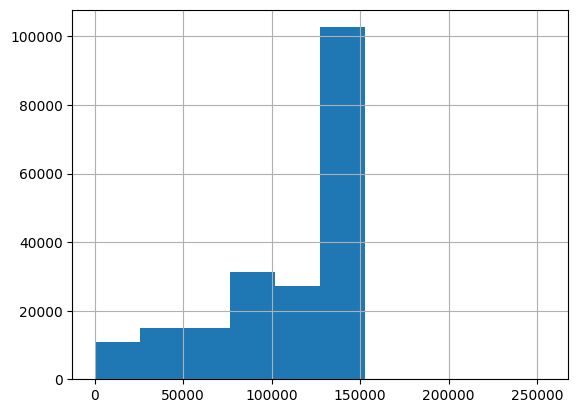

In [18]:
cldf3['km_driven'].hist()

In [19]:
data = cldf3.drop('seller_type', axis=1)

In [20]:
data

,year,transmission,km_driven,fuel,brand,selling_price
0,1993,manual,150000,petrol,volkswagen,43200
1,2011,manual,125000,diesel,audi,1647000
2,2004,automatic,125000,diesel,jeep,882000
3,2001,manual,150000,petrol,volkswagen,135000
4,2008,manual,90000,diesel,skoda,324000
...,...,...,...,...,...,...
215990,2013,manual,50000,petrol,maruti,260000
215991,2014,manual,80000,diesel,hyundai,475000
215992,2013,manual,110000,petrol,hyundai,320000
215993,2007,manual,119000,diesel,hyundai,135000


In [21]:
brandvaluecount = data['brand'].value_counts().reset_index()
lesscountbrands = brandvaluecount[brandvaluecount['count']<100]['brand'].tolist()
lesscountbrands

['datsun', 'force', 'ambassador', 'mg', 'isuzu', 'ashok']

In [22]:
for i in lesscountbrands:
    data['brand'] = data['brand'].replace({i:'other'})

<Axes: >

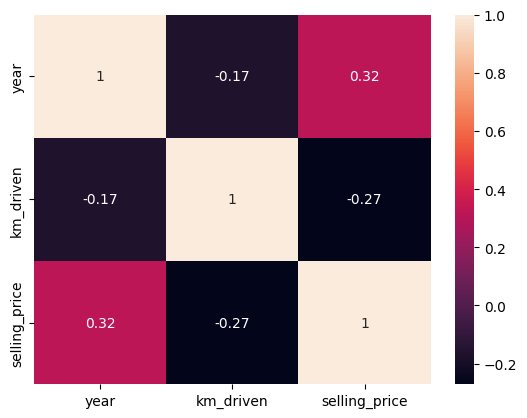

In [28]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [23]:
pickle.dump(data, open('/home/anuraaga/Documents/DataCodes/Projects/pricePredictor/dataset/dataset_car/autos_v7.pkl', 'wb'))